In [12]:
# Copyright 2023 Austin Berrio
# Licensed under CC BY-NC-SA 3.0
import matplotlib.pyplot as plt

In [13]:
# Function to simulate a sequence of steps and calculate the label for each epoch
def simulate_label(loss, learning_rate, frequency, epochs):
    epoch_steps = []
    target_labels = []
    periodic_rate = 1 + (learning_rate / frequency)

    for epoch in range(1, epochs + 1):
        improvement_rate = pow(periodic_rate, epoch)
        label = loss * epoch * improvement_rate
        epoch_steps.append(epoch)
        target_labels.append(label)

    return epoch_steps, target_labels

In [14]:
# Function to simulate a sequence of steps with correct interval and calculate the label for each epoch
def simulate_label_with_correct_interval(loss, learning_rate, frequency, epochs):
    current_loss = loss
    epoch_steps_correct_interval = []
    target_labels_correct_interval = []
    periodic_rate = 1 + (learning_rate / frequency)

    for epoch in range(1, epochs + 1):
        improvement_rate = pow(periodic_rate, epoch)
        label = current_loss * improvement_rate
        epoch_steps_correct_interval.append(epoch)
        target_labels_correct_interval.append(label)
        current_loss = label

    return epoch_steps_correct_interval, target_labels_correct_interval

In [15]:
# Constants for the new simulation
loss = 0.5
learning_rate = 0.1
frequency = 100
epochs = 100  # Increased number of epochs to better visualize the results

In [16]:
# Generate the sequence with the original formula
epoch_steps, target_labels = simulate_label(loss, learning_rate, frequency, epochs)

# Generate the sequence with correct interval passing
epoch_steps_correct_interval, target_labels_correct_interval = simulate_label_with_correct_interval(
    loss, learning_rate, frequency, epochs
)

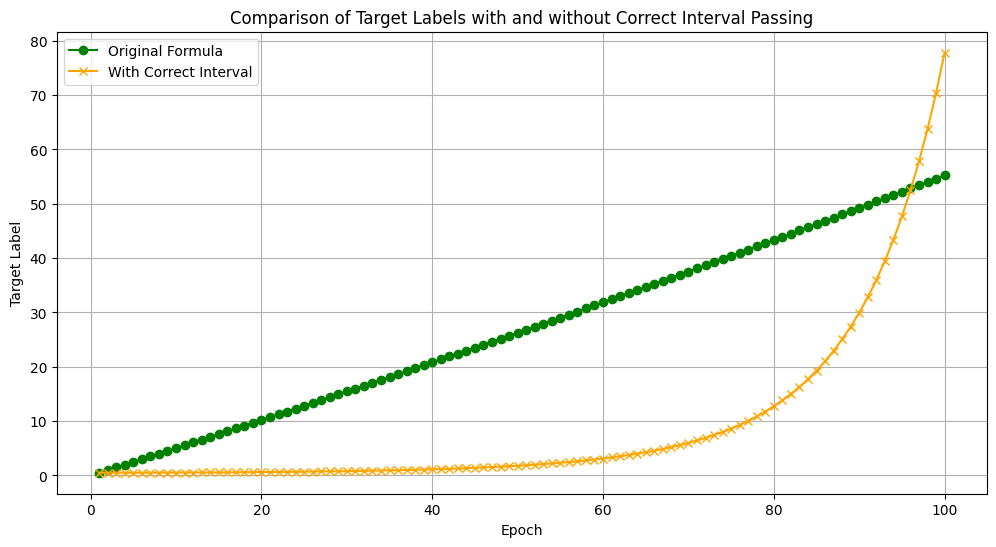

In [17]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(epoch_steps, target_labels, marker="o", color="green", label="Original Formula")
plt.plot(epoch_steps_correct_interval, target_labels_correct_interval, marker="x", color="orange", label="With Correct Interval")
plt.title("Comparison of Target Labels with and without Correct Interval Passing")
plt.xlabel("Epoch")
plt.ylabel("Target Label")
plt.grid(True)
plt.legend()
plt.show()

**GPT-4's Observations:**

1. **Original Formula (Green)**: This one is linear because each "epoch" is essentially a multiplier, resulting in a straight line. The compounding effect is nullified because the current label isn't carried over to the next epoch.
  
2. **Corrected Formula (Orange)**: This formula starts off flat but becomes increasingly exponential as the epochs increase. That's because, in this case, the label is carried over to subsequent epochs, allowing the compounding effect to really kick in. The growth is modest initially but rapidly increases as you move toward higher epochs, demonstrating the power of compounding.

The corrected formula for the label in the context of this hypothetical machine learning scenario is:

```
label = current_loss x (1 + learning_rate/frequency)^epoch
```

Here's a breakdown of the terms:

- `current_loss`: The error at the current epoch, analogous to the principal amount in finance.
- `learning_rate`: The learning rate, analogous to the interest rate.
- `frequency`: The frequency of compounding, which in this context could be the frequency of updates to the loss.
- `epoch`: The current epoch, analogous to the interval in finance.

The key difference in the corrected formula is that we carry over the label (or the desired outcome) from one epoch to the next. This allows for the compounding effect to manifest, resulting in exponential growth, especially as the number of epochs increases.

The learning rate remains defined in the same way—it represents the step size for updating the model's parameters during training. In this hypothetical scenario, it serves a role analogous to the interest rate in financial compounding. The learning rate controls the rate at which the model learns from the data. Lower learning rates lead to slower convergence but potentially better generalization, while higher learning rates might lead to faster convergence but also the risk of overshooting the optimal solution.

It's fascinating to see how the concept of compounding, often discussed in finance, can offer valuable insights in other domains like machine learning.